In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris, load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
df = pd.read_csv('heart.csv')

In [4]:
X = df.drop("target", axis=1)
y = df["target"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
scores = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    scores.append(score)

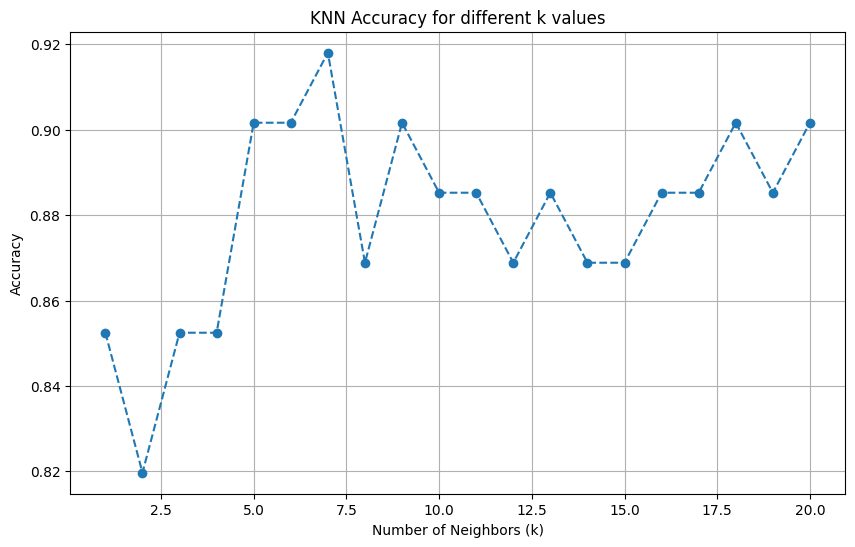

In [8]:
plt.figure(figsize=(10,6))
plt.plot(k_values, scores, marker='o', linestyle='--')
plt.title('KNN Accuracy for different k values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [9]:
best_k = k_values[np.argmax(scores)]
print(f"Best k: {best_k} with accuracy: {max(scores):.4f}")

Best k: 7 with accuracy: 0.9180


In [10]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_pred = best_knn.predict(X_test_scaled)

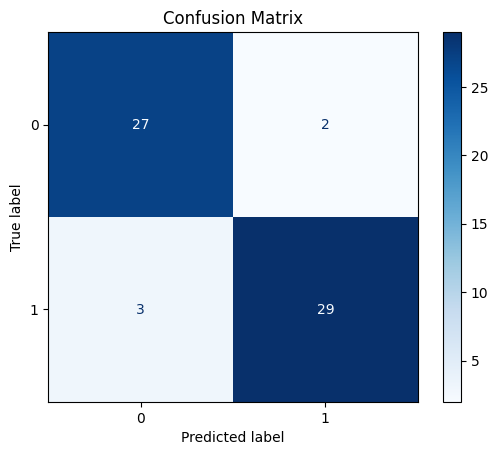

In [13]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [14]:
report = classification_report(y_test, y_pred, output_dict=False)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

